<H1> Project - Data Visualization </H1>

As a part of Data Visualization project in Data Analyst Nanodegree program at Udacity I will download and read dataset related to Loan Data from Prosper. I will explore different variables to be able to determine which factors affect a loan’s outcome status and borrower rate. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

<H2> Gathering data </H2>

First, I will read csv file "prosperLoanData.csv".

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


<H2>Assessing Data</H2>

Now, when I have prepared the dataframe for this project, I will focus on detecting quality and tideness issues among them in order to be able to fix them and prepare for data visualization process.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

Now, I will check descriptive statistics for numerical variables.

In [4]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


Checking if there are duplicates.

In [5]:
sum(df.duplicated())

0

In [69]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due                   2067
FinalPaymentInProgress      205
Cancelled                     5
Name: LoanStatus, dtype: int64

In [7]:
type(df['LoanStatus'][0])

str

Since there is a couple of categories in variable 'LoanStatus' with a small number of cases but they basically represent the same thing (Past Due (1-15 days), Past Due ...), I will rename them so that all of them are just 'Past Due' by using the regular expression.

In [8]:
for i in range(df.shape[0]):
    if re.match(r'Past Due.*', df.LoanStatus[i]):
                df.LoanStatus[i]='Past Due'

/Users/jelenamitrovic/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due                   2067
FinalPaymentInProgress      205
Cancelled                     5
Name: LoanStatus, dtype: int64

I will now convert LoanStatus variable into categorical.

In [10]:
var_dict = {'LoanStatus': ['Current','Completed','Chargedoff','Defaulted','Past Due', 'FinalPaymentInProgress', 'Cancelled']}

for v in var_dict:
    var = pd.api.types.CategoricalDtype(categories = var_dict[v])
    df[v] = df[v].astype(var)

Also, I will do the same for variable 'IncomeRange'.

In [30]:
var_dict_2 = {'IncomeRange': ['Not employed', '$0', '$1-24,999', '$25,000-49,999', 
                            '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not displayed']}

for v in var_dict_2:
    var = pd.api.types.CategoricalDtype(ordered = True, categories = var_dict_2[v])
    df[v] = df[v].astype(var)


<h2>Univariate Visualization</h2>

First, I'll be looking at the distribution of LoanStatus by showing frequencies of each category.

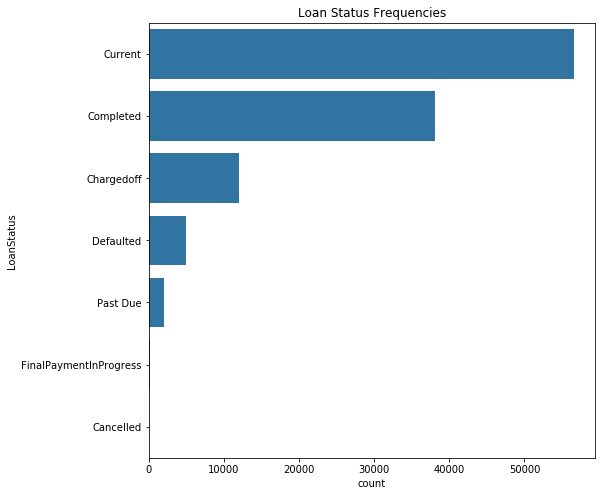

In [97]:
fig, ax = plt.subplots(nrows=1, figsize = [8,8])

default_color = sns.color_palette()[0]
sns.countplot(data = df, y = 'LoanStatus', color = default_color, ax = ax)
plt.title('Loan Status Frequencies')
plt.show()

The majority of loans are with status "current", but completed and charged off are right behind.

Also, I will continue doing that by taking different categorical variables.

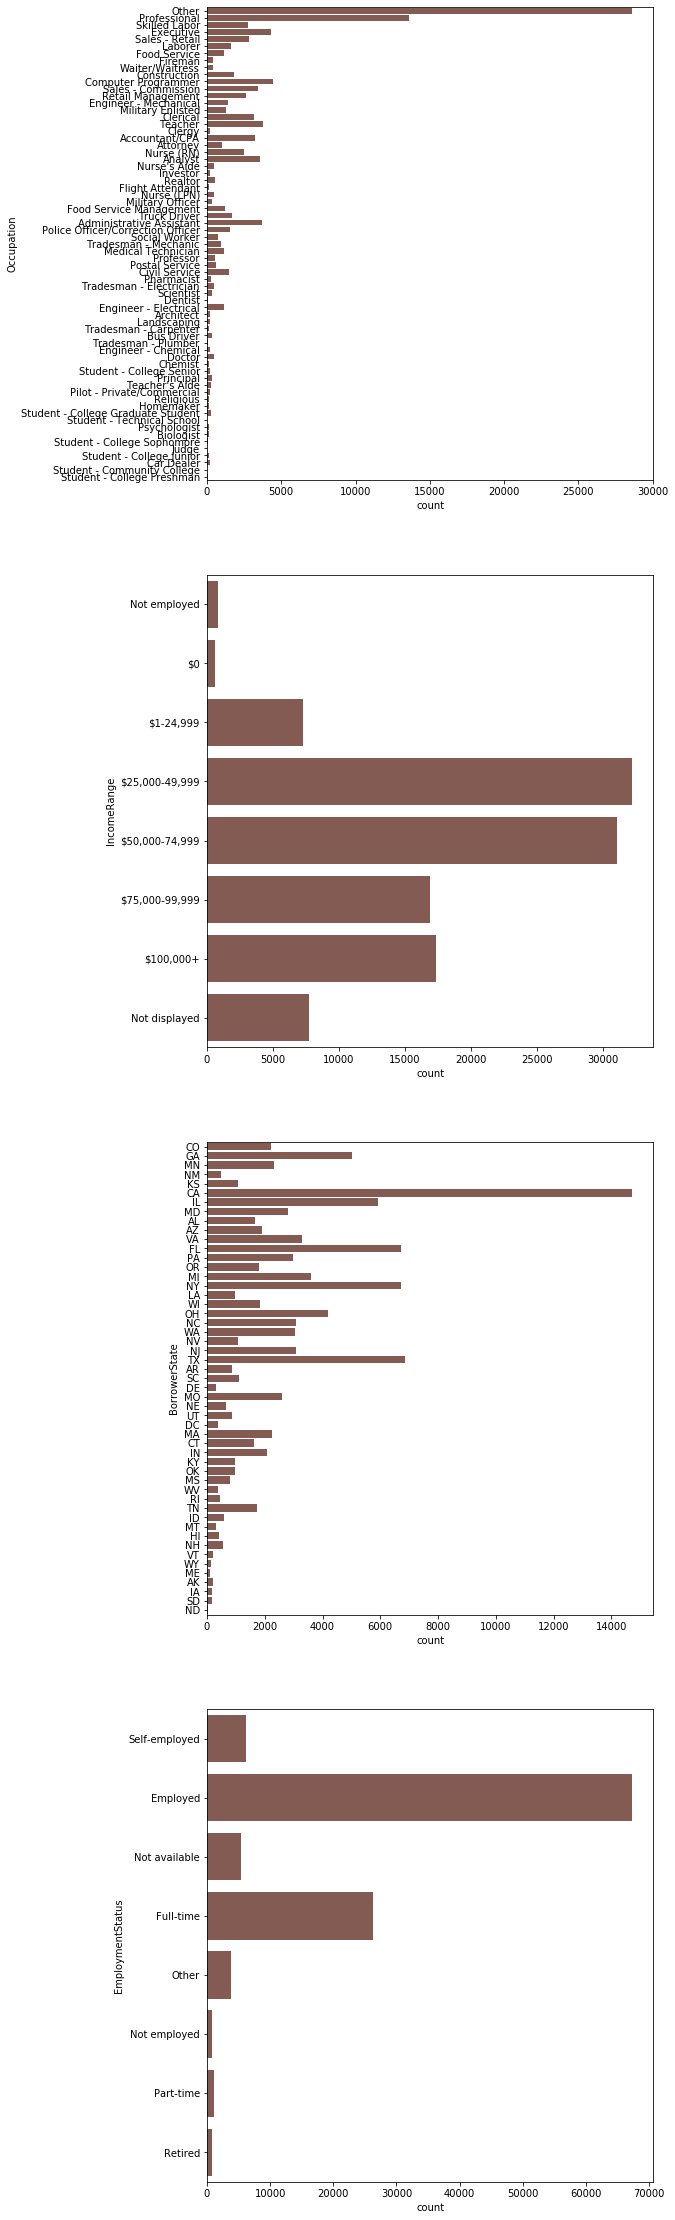

In [107]:
fig, ax = plt.subplots(nrows=4, figsize = [8,40])

default_color = sns.color_palette()[5]
sns.countplot(data = df, y = 'Occupation', color = default_color, ax = ax[0])
sns.countplot(data = df, y = 'IncomeRange', color = default_color, ax = ax[1])
sns.countplot(data = df, y = 'BorrowerState', color = default_color, ax = ax[2])
sns.countplot(data = df, y = 'EmploymentStatus', color = default_color, ax = ax[3])
plt.show()

Occupation and Borrower State have a lot of categories which is the reason I will not use them further. The majority of people are employed and full-time employed and have income between 25k and 75k.

Now, I will check the distribution of three numerical variables - 'BorrowerRate', 'Investors' and 'LoanOriginalAmount'.

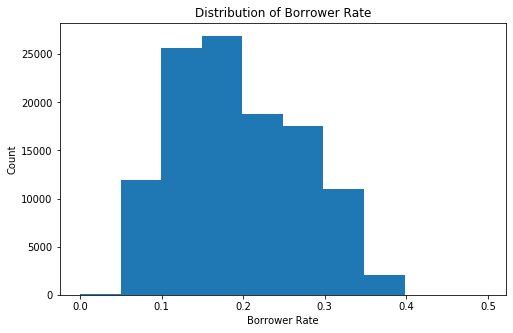

In [101]:
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerRate')
plt.xlabel('Borrower Rate')
plt.ylabel('Count')
plt.title('Distribution of Borrower Rate')
plt.show()

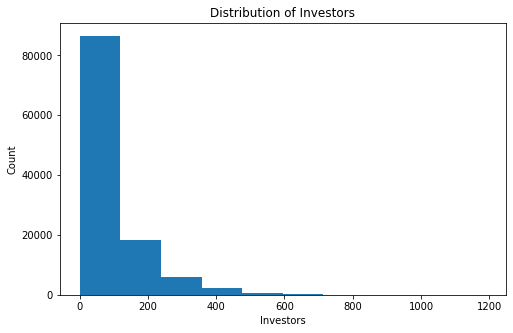

In [102]:
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'Investors')
plt.xlabel('Investors')
plt.ylabel('Count')
plt.title('Distribution of Investors')
plt.show()

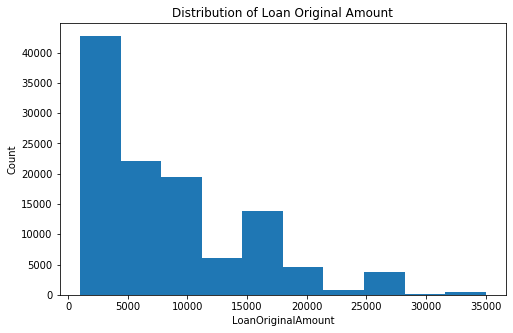

In [103]:
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'LoanOriginalAmount')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Count')
plt.title('Distribution of Loan Original Amount')
plt.show()

Borrower Rate seems to have normal distributio, while Investors and Loan Original Amount are right skewed.

<h2> Bivariate Visualization</h2>

After exploring each variable separately, I will now perform different combination of 2 variables.

I will use the violin graph to see the relationship between BorrowerRate and IncomeRange variables. 

Text(0.5, 1.0, 'Income Range and Borrower Rate')

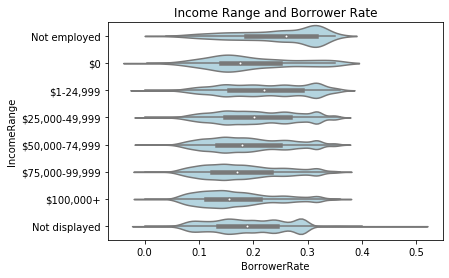

In [104]:
sns.violinplot(data = df, x = 'BorrowerRate', y = 'IncomeRange', color = 'lightblue')
plt.title('Income Range and Borrower Rate')

It seems that the higher the income range the smaller the borrower rate.

Here, I will use seaborn countplot to see the relationship between IncomeRange and LoanStatus. 

Text(0.5, 1.0, 'Income Range and Loan Status')

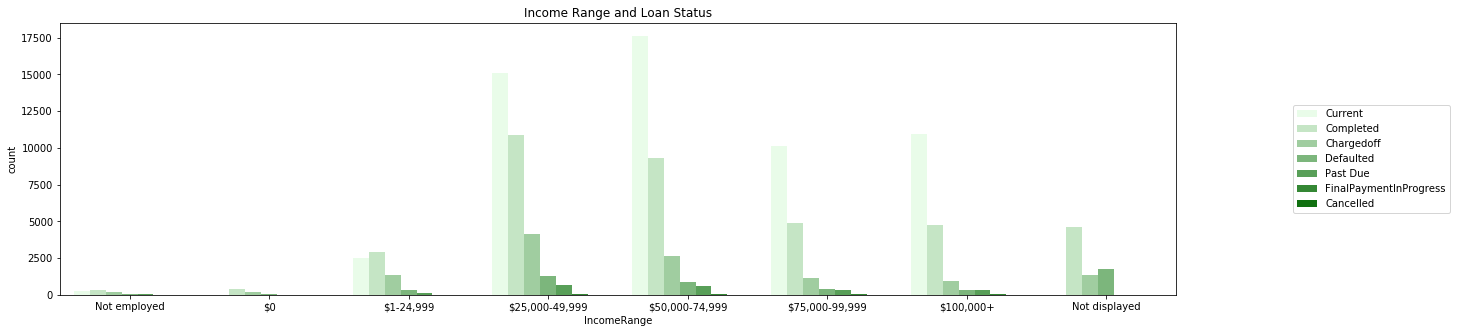

In [105]:
plt.figure(figsize=(20,5))
g = sns.countplot(data = df, x = 'IncomeRange', hue = 'LoanStatus', color = 'green')
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Income Range and Loan Status')

According to the graph, the majority of people with current loan fall in between 25k and 75k income range. The highest number of completed loans falls into category of people with income range from 25k to 50k.

Now I will show the relationship between the number of investors and borrower rate.

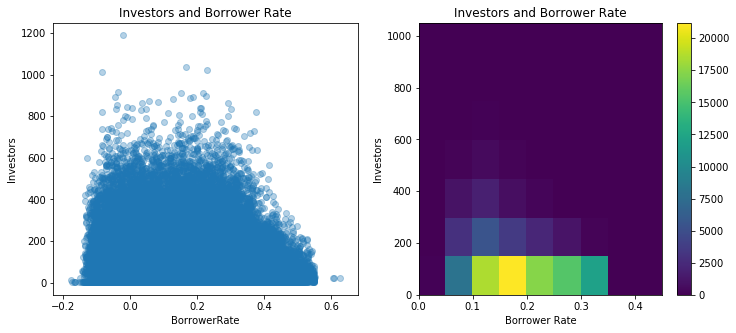

In [120]:
plt.figure(figsize = [12, 5])

plt.subplot(1, 2, 1)
sns.regplot(data = df, x = 'BorrowerRate', y = 'Investors', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})
plt.title('Investors and Borrower Rate')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, 0.5, 0.05)
bins_y = np.arange(0, 1200, 150)
plt.hist2d(data = df, x = 'BorrowerRate', y = 'Investors',
           bins = [bins_x, bins_y])
plt.title('Investors and Borrower Rate')
plt.xlabel('Borrower Rate')
plt.ylabel('Investors')
plt.colorbar();

 The highest number of investors is for loans with borrower rate between 0.1 and 0.2. 

I will bring into relationship the amount of loan with income range by using box plot. 

Text(0.5, 1.0, 'Income Range and Loan Original Amount')

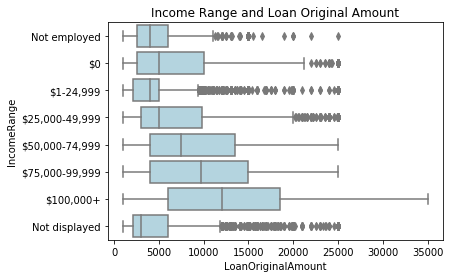

In [110]:
sns.boxplot(data = df, x = 'LoanOriginalAmount', y = 'IncomeRange', color = 'lightblue')
plt.title('Income Range and Loan Original Amount')

It seems that the higher the income the bigger the loan amount.

I will use box plot to see the relationship between Loan Status and Loan Original Amount.

Text(0.5, 1.0, 'Loan Status and Loan Original Amount')

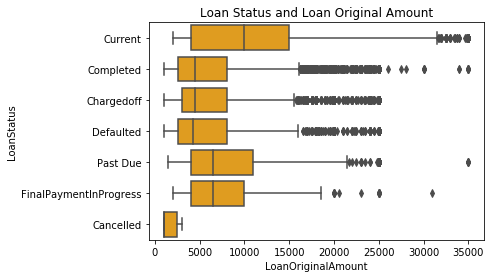

In [111]:
sns.boxplot(data = df, x = 'LoanOriginalAmount', y = 'LoanStatus', color = 'orange')
plt.title('Loan Status and Loan Original Amount')

It seems that there is no significant differences in the amount of loan for different loan status.

Also, I explored the relationship between the amount of loan with the number of investors. 

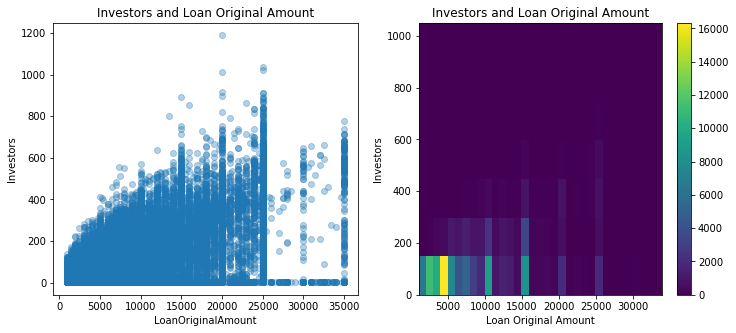

In [121]:
plt.figure(figsize = [12, 5])

plt.subplot(1, 2, 1)
sns.regplot(data = df, x = 'LoanOriginalAmount', y = 'Investors', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})
plt.title('Investors and Loan Original Amount')

plt.subplot(1, 2, 2)
bins_x = np.arange(1000, 35000, 1000)
bins_y = np.arange(0, 1200, 150)
plt.hist2d(data = df, x = 'LoanOriginalAmount', y = 'Investors',
           bins = [bins_x, bins_y])
plt.title('Investors and Loan Original Amount')
plt.xlabel('Loan Original Amount')
plt.ylabel('Investors')
plt.colorbar();

Apparently, the highest number of investors is for people who take the loan around 20k. 

<h2> Multivariate Visualization</h2>

Here, I will combine more than 2 variables to see their relationship.

I want to see the difference between different loan status in borrower rate and investors.

Text(0.5, 20.799999999999457, 'Borrower Rate')

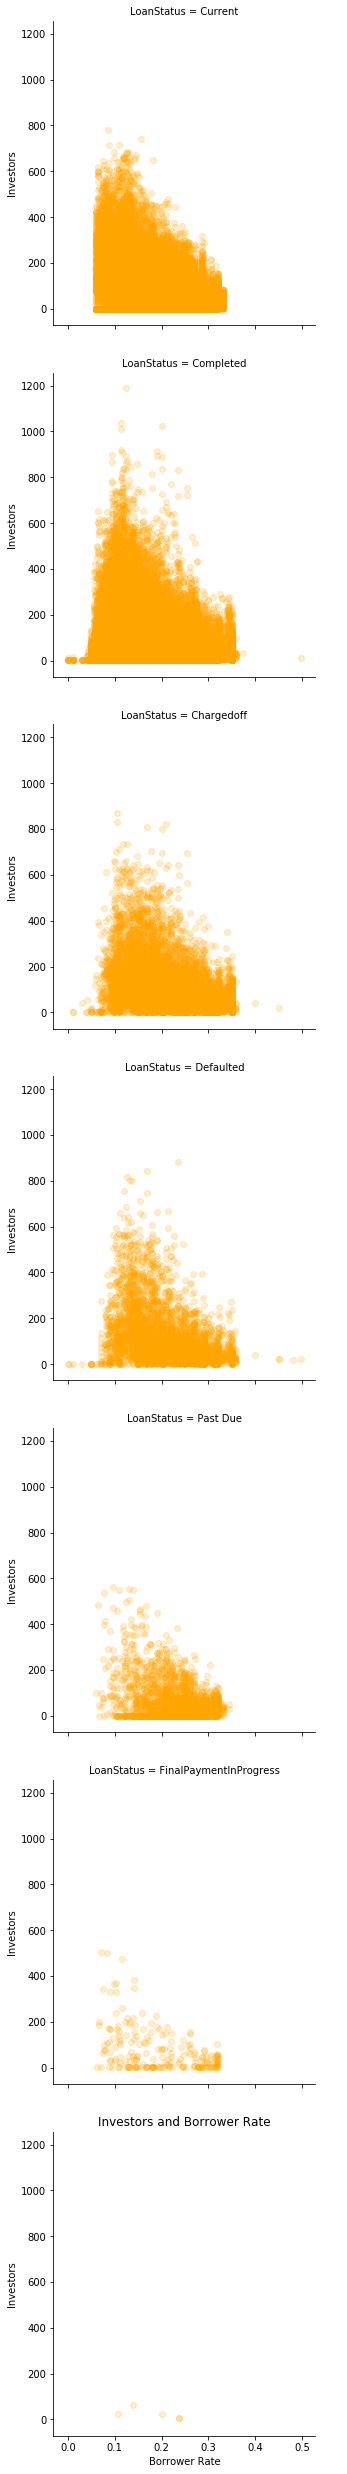

In [131]:
m = sns.FacetGrid(data = df, row = 'LoanStatus', size = 5)
m.map(plt.scatter, 'BorrowerRate', 'Investors', color = 'orange', alpha = 0.2)
m.add_legend()
plt.tight_layout(pad=3.0)
plt.title('Investors and Borrower Rate')
plt.xlabel('Borrower Rate')

The current loan rates are sharply defined, in contrast with other previous loans which had a rate lower and higher than current typical amounts.

Here, I want to see if there is a difference between different loan statuses in Borrower Rate and number of Investors.

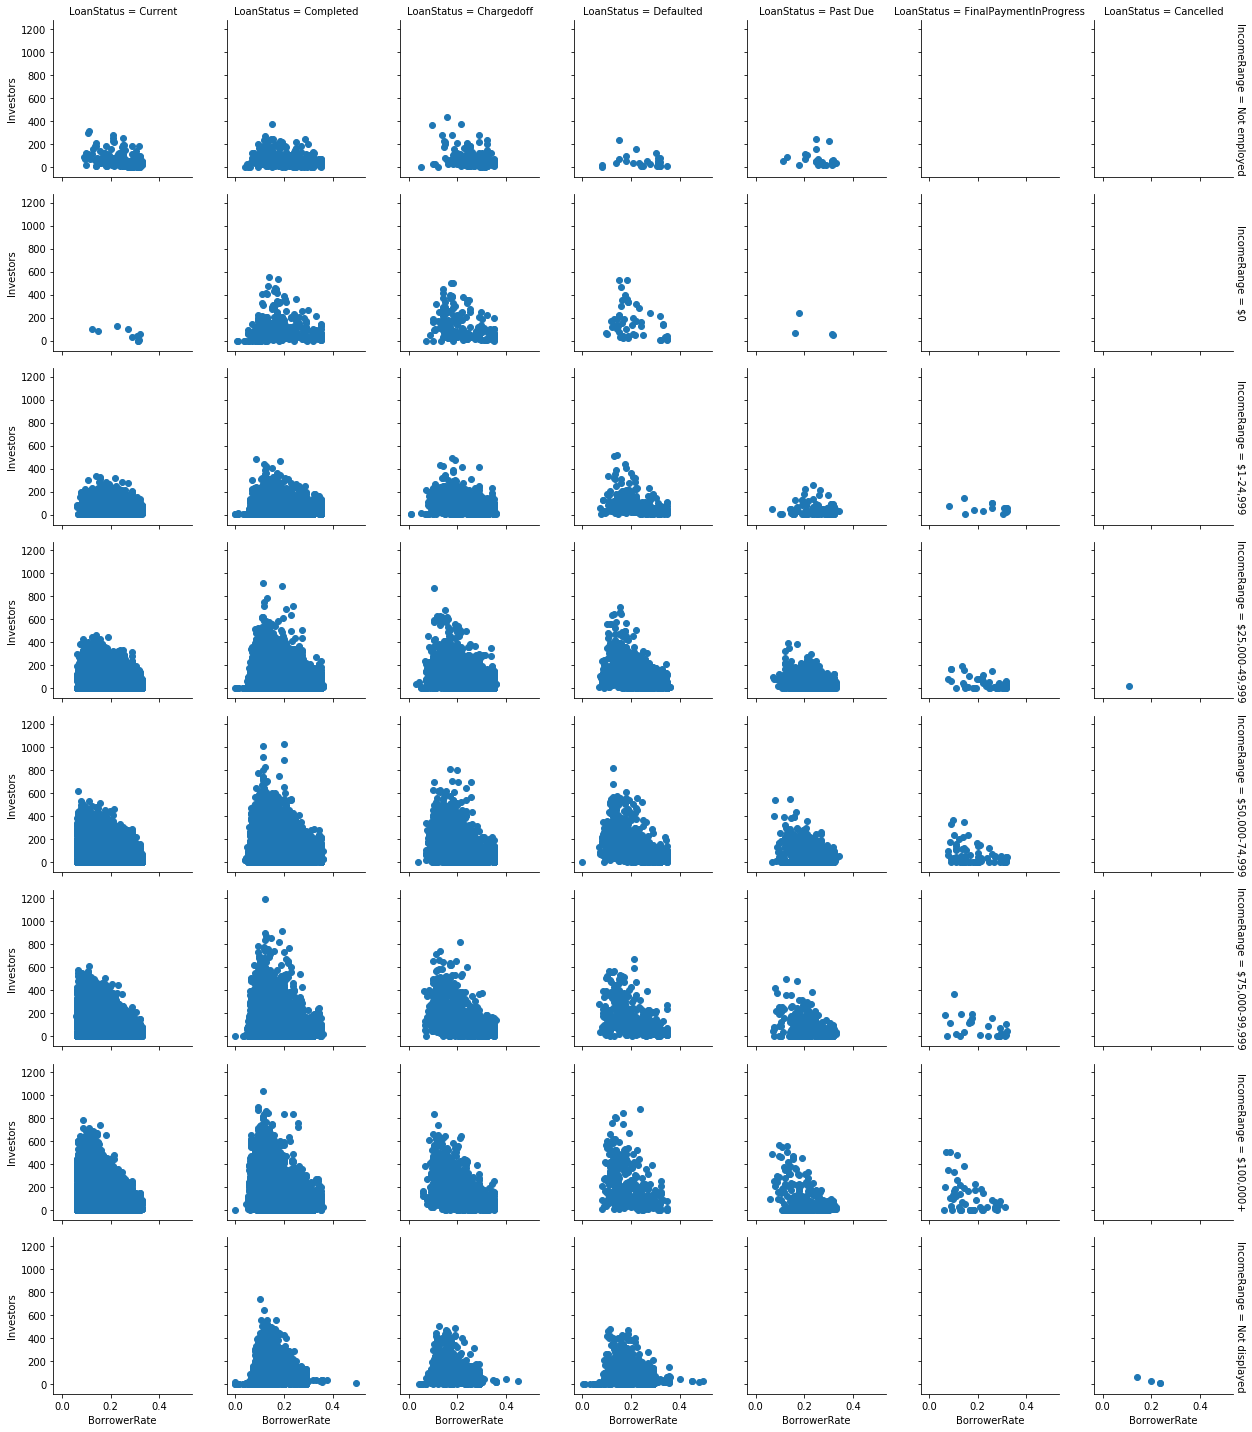

In [51]:
f = sns.FacetGrid(data = df, col = 'LoanStatus', row = 'IncomeRange', size = 2.5,
                margin_titles = True)
f.map(plt.scatter, 'BorrowerRate', 'Investors')

The highest number of investors is related to income range between 50k and 75k while the most frequently the borrower rate is 0.2.

I will use pairgrid to see the relationship between Borrower Rate and Investors.

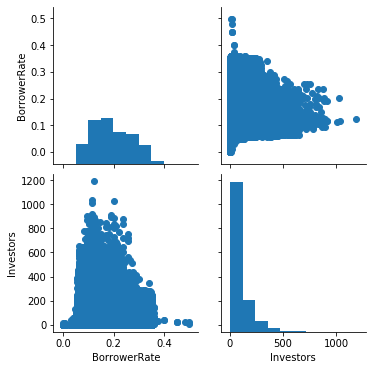

In [116]:
p = sns.PairGrid(data = df, vars = ['BorrowerRate', 'Investors'])
p.map_diag(plt.hist)
p.map_offdiag(plt.scatter)

The graph shows that the highest number of investors is for borrower rate around 0.2

Here I want to see the distribution of Borrower Rate and Investors between different groups in Loan Status and Employment status.

<Figure size 864x864 with 0 Axes>

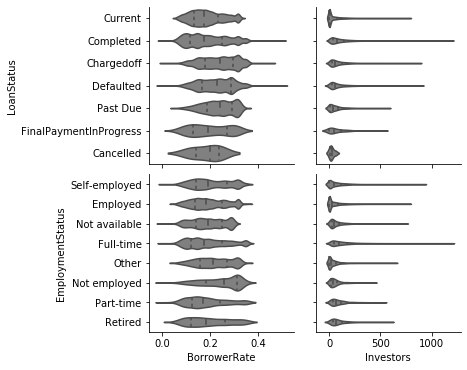

In [60]:
plt.figure(figsize = [12, 12])
pg = sns.PairGrid(data = df, x_vars = ['BorrowerRate', 'Investors'],
                y_vars = ['LoanStatus','EmploymentStatus'])
pg.map(sns.violinplot, color='gray', inner = 'quartile')

From the graph above, I cannot make any significant conclusion.

Now I want to see the relationshi between Loan Status and Income Range, Loan Status and Employment Status, and Employment Status and Income Range.

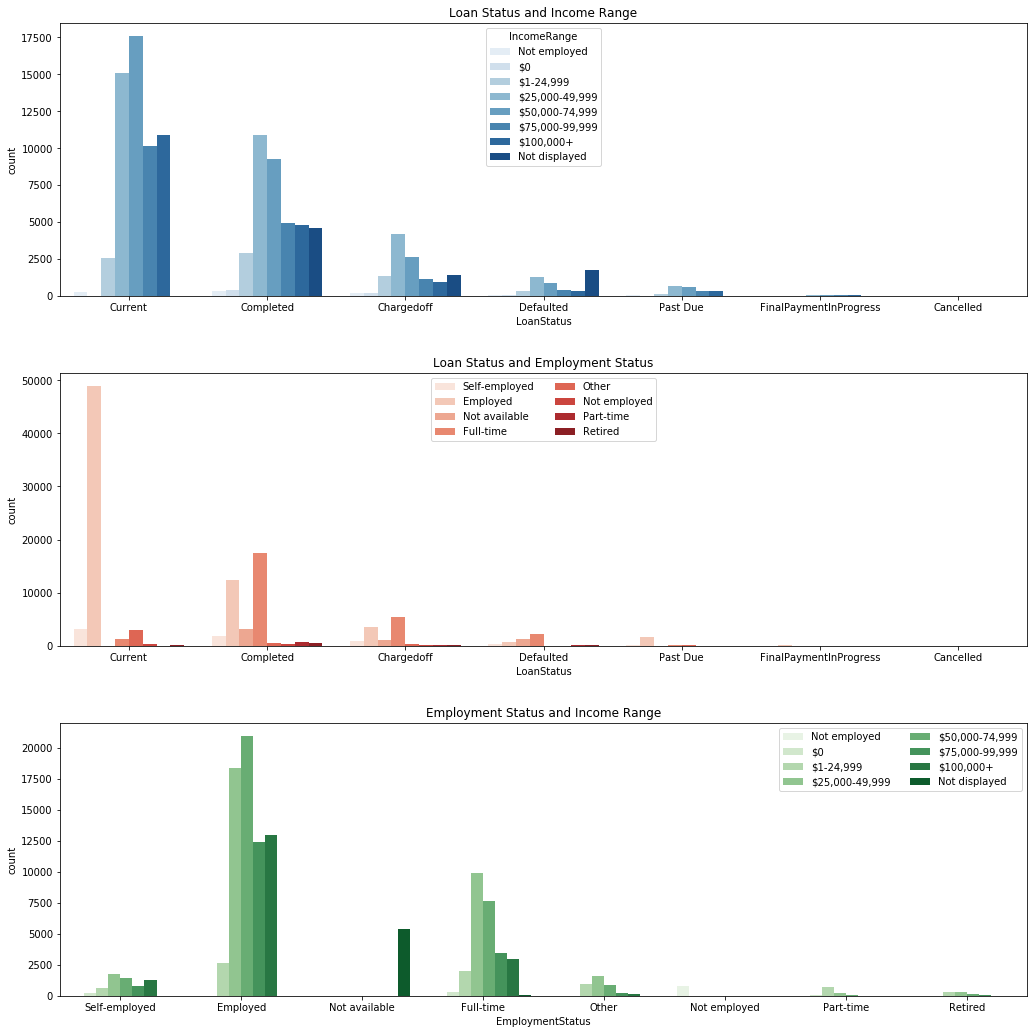

In [127]:
figure = plt.figure(figsize = [15, 15])

# subplot 1: LoanStatus vs IncomeRange
plt.subplot(3, 1, 1)
sns.countplot(data = df, x = 'LoanStatus', hue = 'IncomeRange', palette = 'Blues')
plt.title('Loan Status and Income Range')


# subplot 2: LoanStatus vs. EmploymentStatus
ax = plt.subplot(3, 1, 2)
sns.countplot(data = df, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'Reds')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.title('Loan Status and Employment Status')


# subplot 3: EmploymentStatus vs. IncomeRange
ax = plt.subplot(3, 1, 3)
sns.countplot(data = df, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Greens')
ax.legend(ncol = 2) 
plt.title('Employment Status and Income Range')
figure.tight_layout(pad=3.0)

plt.show()

People with the highest number of current loans fall into income range category between 50k and 75k, while completed loans are the highest for people between 25k and 50k income range.

The current loans are the highest for people who are employed, while completed loans are the highest for people who are full-time employed.

Out of people who are employed there most of them fall into income range category of 50k-70k, while people who are full-time employed have 35k-50k per year.

Finally, I want to see the how the loan amount and the number of investors differ between differenc employment status groups. 

Text(0.5, 1, 'Investors and Loan Original Amount')

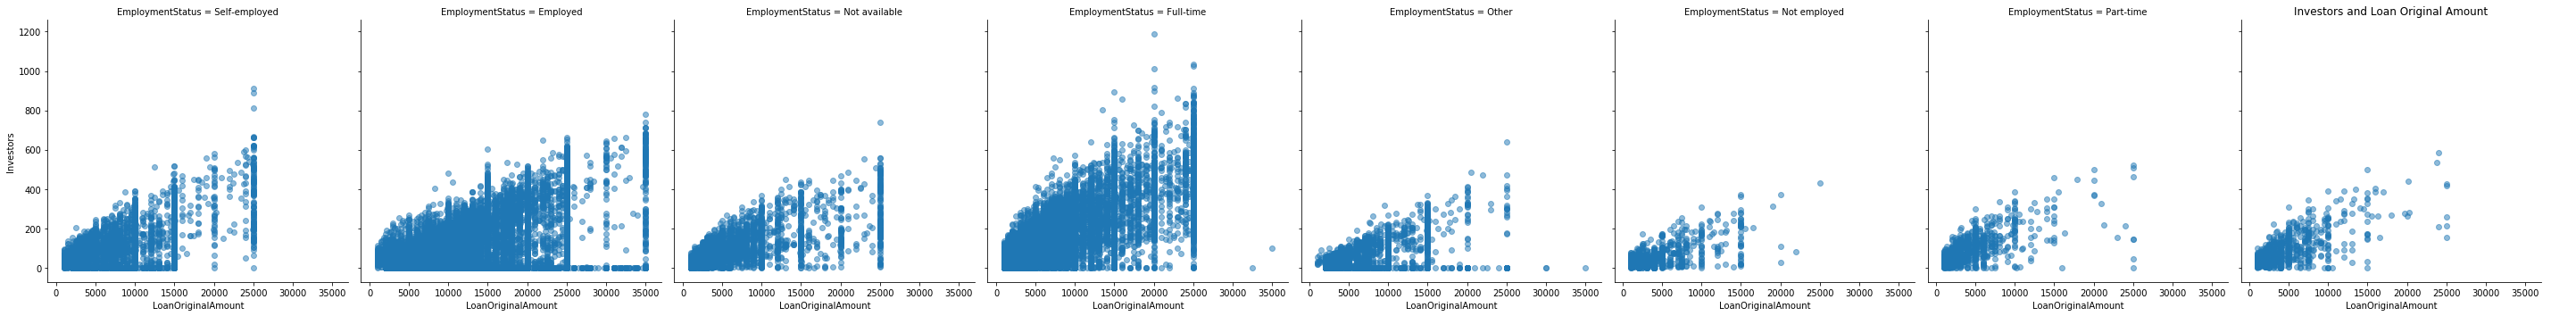

In [134]:
r = sns.FacetGrid(data = df, col = 'EmploymentStatus', size = 5,
                 palette = 'colorblind')
r.map(plt.scatter, 'LoanOriginalAmount', 'Investors', alpha = 0.5)
r.add_legend()
plt.title('Investors and Loan Original Amount');

The number of investors increases with the loan amount for people who are full-time employed, while for retirees or part-time workers both the number of investors and the amount of loan are lower.